# Konsep Dasar Regresi

Pada notebook ini, kita akan membahas konsep dasar regresi yang merupakan salah satu teknik fundamental dalam machine learning dan statistika.

## Apa itu Regresi?

Regresi adalah teknik statistik untuk memodelkan hubungan antara variabel dependen (target) dengan satu atau lebih variabel independen (fitur). Tujuan utamanya adalah untuk:
1. Memahami hubungan antar variabel
2. Memprediksi nilai variabel target
3. Mengidentifikasi variabel yang berpengaruh signifikan

## Jenis-jenis Regresi

1. **Regresi Linear Sederhana**:
   - Satu variabel independen
   - Model: y = β₀ + β₁x + ε

2. **Regresi Linear Berganda**:
   - Multiple variabel independen
   - Model: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

3. **Regresi Polinomial**:
   - Hubungan non-linear
   - Model: y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε

## Asumsi Dasar Regresi Linear

1. Linearitas
2. Independensi error
3. Homoskedastisitas (variansi konstan)
4. Normalitas residual
5. Tidak ada multikolinearitas (untuk regresi berganda)

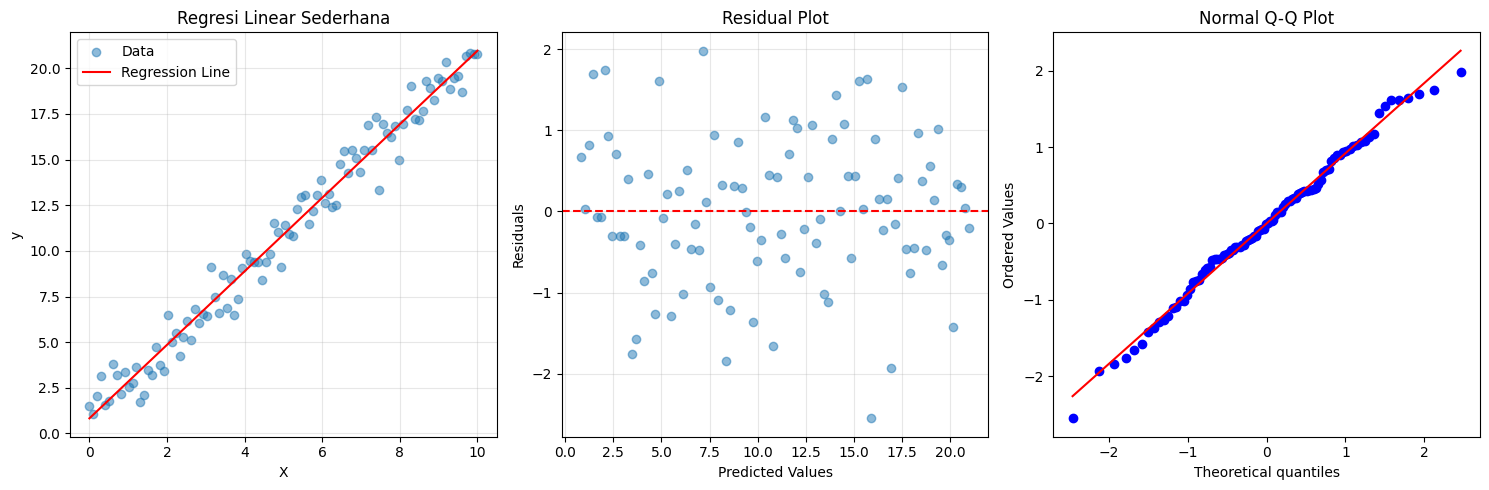

Model Statistics:
Intercept (β₀): 0.8272
Slope (β₁): 2.0138
R² Score: 0.9769
Mean Squared Error: 0.8149


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for simple linear regression
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, size=(n_samples, 1))

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Plot results
plt.figure(figsize=(15, 5))

# Plot 1: Data and regression line
plt.subplot(131)
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresi Linear Sederhana')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y - y_pred
plt.subplot(132)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 3: QQ Plot for normality check
from scipy import stats
plt.subplot(133)
stats.probplot(residuals.ravel(), dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

# Print model statistics
print("Model Statistics:")
print(f"Intercept (β₀): {model.intercept_[0]:.4f}")
print(f"Slope (β₁): {model.coef_[0][0]:.4f}")
print(f"R² Score: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.4f}")

## Regresi Linear Berganda

Regresi linear berganda memodelkan hubungan antara variabel target dengan beberapa variabel independen. Ini sangat umum dalam praktik karena kebanyakan fenomena dipengaruhi oleh banyak faktor.

Persamaan regresi linear berganda:
\[ y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε \]

Mari kita lihat contoh dengan dua variabel independen:

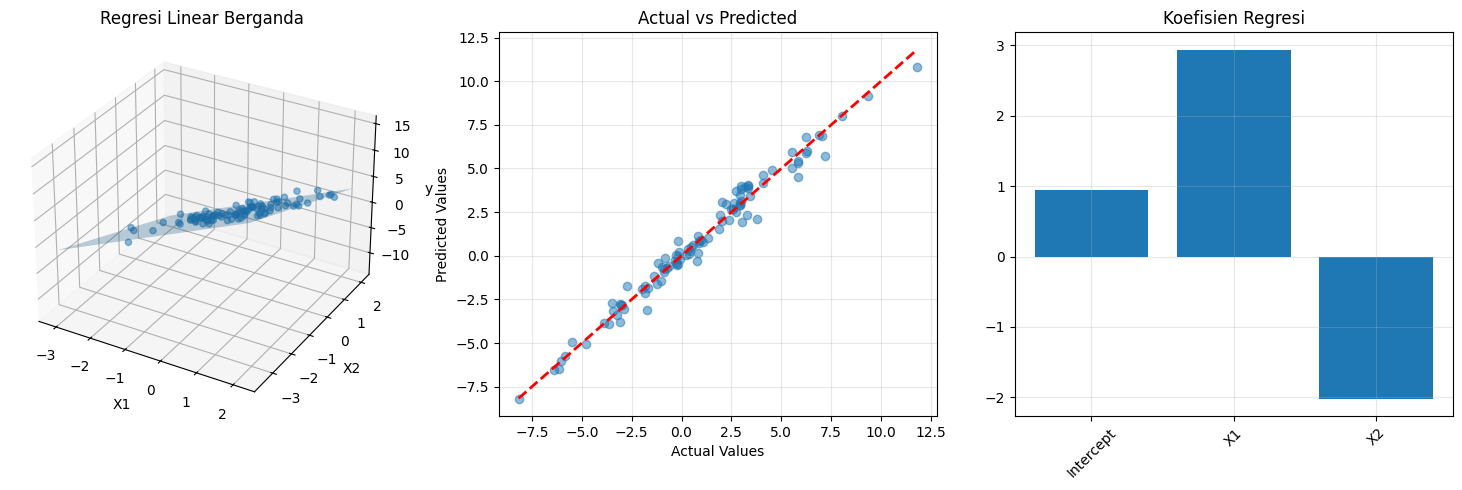

Model Statistics:
Intercept (β₀): 0.9482
Coefficient X1 (β₁): 2.9336
Coefficient X2 (β₂): -2.0158
R² Score: 0.9781
Mean Squared Error: 0.2890

Correlation Matrix:
            X1      X2       y
X1:    1.0000  0.0566  0.8157
X2:    0.0566  1.0000  -0.5122
y:     0.8157  -0.5122  1.0000


In [66]:
# Generate data for multiple linear regression
n_samples = 100

# Generate two features
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X = np.column_stack([X1, X2])

# Generate target with some noise
y = 3 * X1 - 2 * X2 + 1 + np.random.normal(0, 0.5, n_samples)

# Fit multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Create 3D visualization
fig = plt.figure(figsize=(15, 5))

# Plot 1: 3D scatter plot with regression plane
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X1, X2, y, alpha=0.5)

# Create mesh grid for regression plane
x1_grid, x2_grid = np.meshgrid(
    np.linspace(X1.min(), X1.max(), 20),
    np.linspace(X2.min(), X2.max(), 20)
)
X_grid = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])
y_grid = model.predict(X_grid)
y_grid = y_grid.reshape(x1_grid.shape)

ax1.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.3)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('y')
ax1.set_title('Regresi Linear Berganda')

# Plot 2: Actual vs Predicted
plt.subplot(132)
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

# Plot 3: Feature Importance
plt.subplot(133)
coefficients = [model.intercept_] + list(model.coef_)
features = ['Intercept', 'X1', 'X2']
plt.bar(features, coefficients)
plt.title('Koefisien Regresi')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print model statistics
print("Model Statistics:")
print(f"Intercept (β₀): {model.intercept_:.4f}")
print(f"Coefficient X1 (β₁): {model.coef_[0]:.4f}")
print(f"Coefficient X2 (β₂): {model.coef_[1]:.4f}")
print(f"R² Score: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.4f}")

# Calculate and print correlation matrix
correlation_matrix = np.corrcoef(np.column_stack([X, y]).T)
print("\nCorrelation Matrix:")
print("            X1      X2       y")
print(f"X1:    {correlation_matrix[0,0]:.4f}  {correlation_matrix[0,1]:.4f}  {correlation_matrix[0,2]:.4f}")
print(f"X2:    {correlation_matrix[1,0]:.4f}  {correlation_matrix[1,1]:.4f}  {correlation_matrix[1,2]:.4f}")
print(f"y:     {correlation_matrix[2,0]:.4f}  {correlation_matrix[2,1]:.4f}  {correlation_matrix[2,2]:.4f}")

## Regresi Polinomial

Ketika hubungan antara variabel tidak linear, kita bisa menggunakan regresi polinomial. Ini dilakukan dengan menambahkan terms polinomial ke dalam model:

\[ y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε \]

Mari kita lihat bagaimana regresi polinomial dapat menangkap pola non-linear:

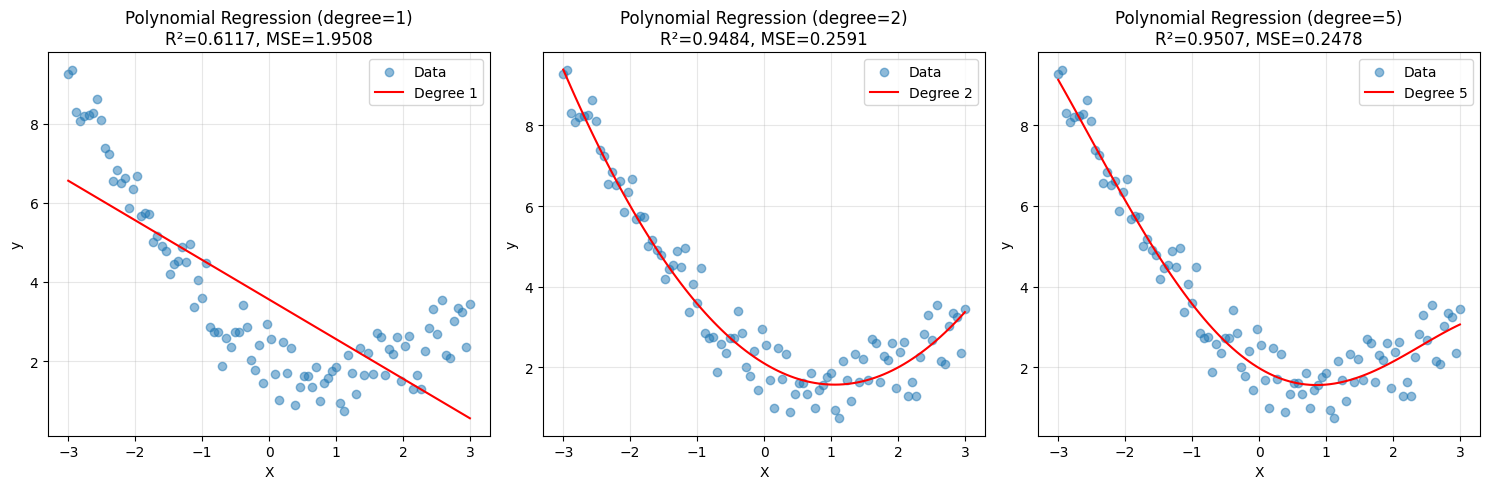

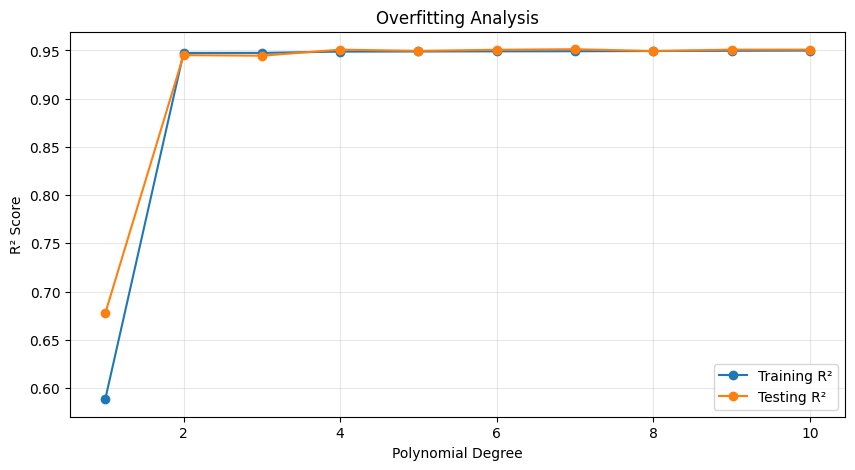

Analisis Overfitting:
Degree 1:
  Training R²: 0.5883
  Testing R²: 0.6775
  Gap: -0.0892

Degree 2:
  Training R²: 0.9474
  Testing R²: 0.9451
  Gap: 0.0023

Degree 3:
  Training R²: 0.9474
  Testing R²: 0.9445
  Gap: 0.0029

Degree 4:
  Training R²: 0.9487
  Testing R²: 0.9507
  Gap: -0.0020

Degree 5:
  Training R²: 0.9489
  Testing R²: 0.9495
  Gap: -0.0007

Degree 6:
  Training R²: 0.9490
  Testing R²: 0.9506
  Gap: -0.0016

Degree 7:
  Training R²: 0.9491
  Testing R²: 0.9512
  Gap: -0.0021

Degree 8:
  Training R²: 0.9493
  Testing R²: 0.9494
  Gap: -0.0000

Degree 9:
  Training R²: 0.9496
  Testing R²: 0.9508
  Gap: -0.0012

Degree 10:
  Training R²: 0.9498
  Testing R²: 0.9508
  Gap: -0.0010



In [68]:
# Generate non-linear data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**2 - 1 * X + 2 + np.random.normal(0, 0.5, (100, 1))

# Create and fit models with different degrees
degrees = [1, 2, 5]  # Linear, Quadratic, and Higher degree
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Generate predictions
    y_pred = model.predict(X_poly)
    
    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(X, y_pred, color='red', label=f'Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (degree={degree})\nR²={r2:.4f}, MSE={mse:.4f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze overfitting with training and testing data
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different polynomial degrees
degrees = range(1, 11)
train_scores = []
test_scores = []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Calculate scores
    train_scores.append(r2_score(y_train, model.predict(X_train_poly)))
    test_scores.append(r2_score(y_test, model.predict(X_test_poly)))

# Plot training and testing scores
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_scores, 'o-', label='Training R²')
plt.plot(degrees, test_scores, 'o-', label='Testing R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Overfitting Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Analisis Overfitting:")
for degree, train_score, test_score in zip(degrees, train_scores, test_scores):
    print(f"Degree {degree}:")
    print(f"  Training R²: {train_score:.4f}")
    print(f"  Testing R²: {test_score:.4f}")
    print(f"  Gap: {train_score - test_score:.4f}\n")

## Evaluasi Model Regresi

Beberapa metrik penting untuk evaluasi model regresi:

1. **R-squared (R²)**:
   - Mengukur proporsi variasi yang dijelaskan oleh model
   - Range: 0 sampai 1
   - R² = 1 - (SS_res / SS_tot)

2. **Mean Squared Error (MSE)**:
   - Rata-rata kuadrat error
   - MSE = (1/n) Σ(y_i - ŷ_i)²

3. **Root Mean Squared Error (RMSE)**:
   - Akar dari MSE
   - Dalam unit yang sama dengan variabel target

4. **Mean Absolute Error (MAE)**:
   - Rata-rata nilai absolut error
   - MAE = (1/n) Σ|y_i - ŷ_i|

Mari kita bandingkan metrik-metrik ini:

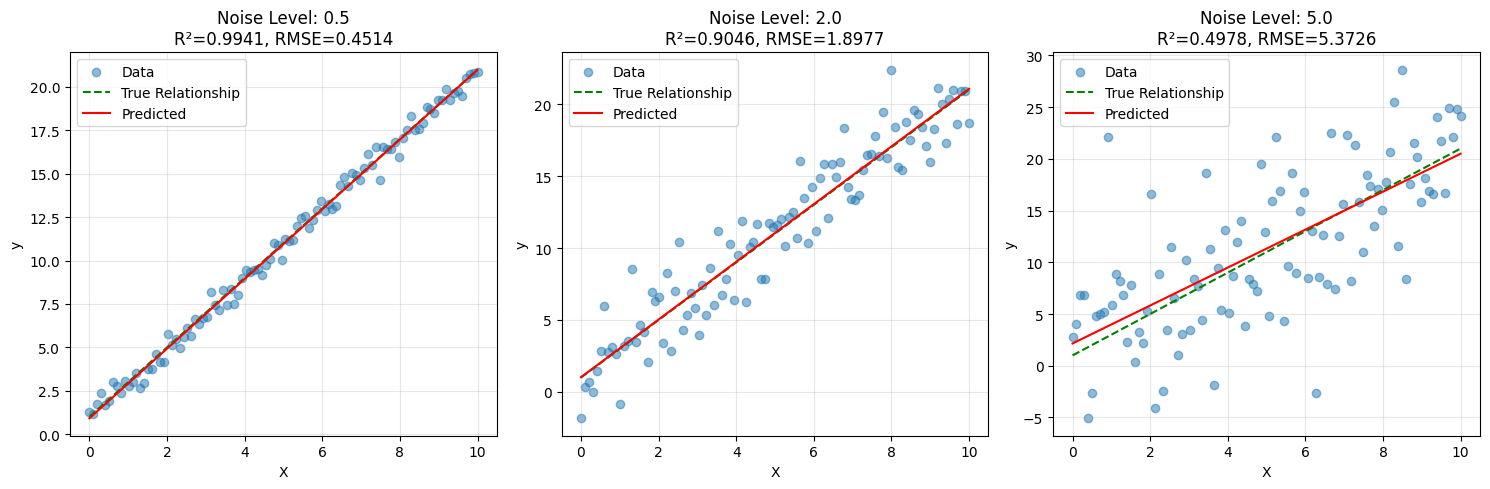


Metrik Evaluasi untuk Berbagai Level Noise:
   Noise Level      R²      MSE    RMSE     MAE
0          0.5  0.9941   0.2037  0.4514  0.3575
1          2.0  0.9046   3.6014  1.8977  1.5085
2          5.0  0.4978  28.8646  5.3726  4.2258


In [72]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd

# Generate data with different noise levels
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = 2 * X + 1

noise_levels = [0.5, 2.0, 5.0]
plt.figure(figsize=(15, 5))

results = []
for i, noise in enumerate(noise_levels, 1):
    # Add noise
    y = y_true + np.random.normal(0, noise, X.shape)
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    
    results.append({
        'Noise Level': noise,
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    })
    
    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(X, y_true, 'g--', label='True Relationship')
    plt.plot(X, y_pred, 'r-', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Noise Level: {noise}\nR²={r2:.4f}, RMSE={rmse:.4f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display results table
results_df = pd.DataFrame(results)
print("\nMetrik Evaluasi untuk Berbagai Level Noise:")
print(results_df.round(4))

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Konsep dasar regresi linear
2. Regresi linear berganda
3. Regresi polinomial
4. Evaluasi model regresi

Poin-poin penting:
- Regresi adalah teknik powerful untuk memodelkan hubungan antar variabel
- Pemilihan model harus mempertimbangkan kompleksitas dan interpretabilitas
- Evaluasi model menggunakan berbagai metrik memberikan pemahaman lebih komprehensif
- Overfitting dapat terjadi pada model yang terlalu kompleks

## Latihan

1. Implementasikan regresi linear sederhana dari awal (tanpa sklearn)
2. Bandingkan performa berbagai derajat polinomial pada dataset real
3. Analisis pengaruh outliers terhadap model regresi
4. Implementasikan cross-validation untuk regresi
5. Visualisasikan confidence intervals untuk prediksi regresi

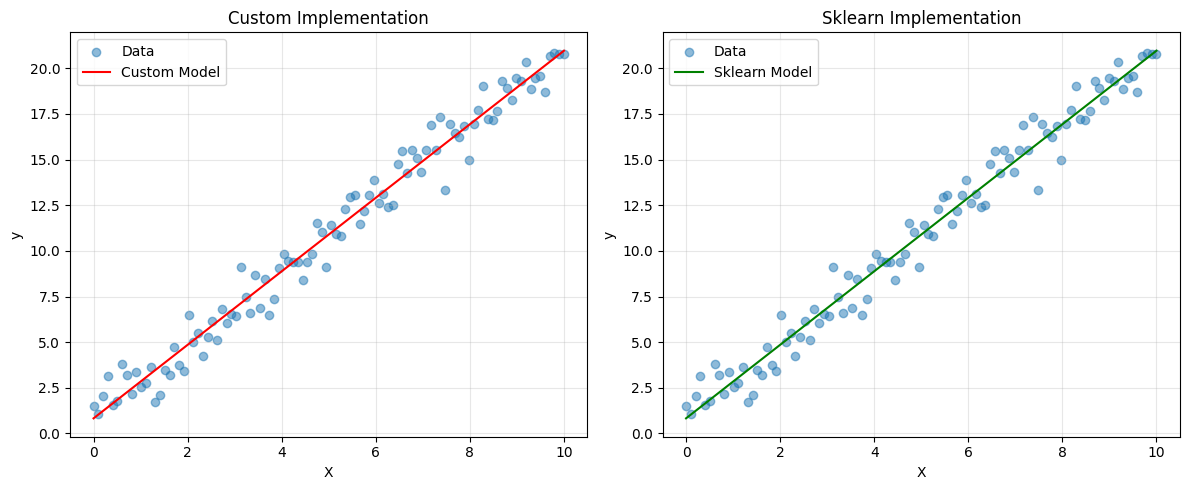

Perbandingan Hasil:
Custom Model - Slope: 2.0138, Intercept: 0.8272
Sklearn Model - Slope: 2.0138, Intercept: 0.8272

Custom Model R²: 0.9769
Sklearn Model R²: 0.9769


In [75]:
# Latihan 1: Implementasi regresi linear sederhana dari awal
class SimpleLinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None
    
    def fit(self, X, y):
        # Calculate means
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate slope
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        self.slope = numerator / denominator
        
        # Calculate intercept
        self.intercept = y_mean - self.slope * x_mean
        
    def predict(self, X):
        return self.slope * X + self.intercept

# Generate data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 1, 100)

# Fit custom model
custom_model = SimpleLinearRegression()
custom_model.fit(X, y)

# Fit sklearn model for comparison
sklearn_model = LinearRegression()
sklearn_model.fit(X.reshape(-1, 1), y)

# Generate predictions
custom_pred = custom_model.predict(X)
sklearn_pred = sklearn_model.predict(X.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, custom_pred, 'r-', label='Custom Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Custom Implementation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(122)
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, sklearn_pred, 'g-', label='Sklearn Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sklearn Implementation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare results
print("Perbandingan Hasil:")
print(f"Custom Model - Slope: {custom_model.slope:.4f}, Intercept: {custom_model.intercept:.4f}")
print(f"Sklearn Model - Slope: {sklearn_model.coef_[0]:.4f}, Intercept: {sklearn_model.intercept_:.4f}")

# Calculate R² scores
custom_r2 = r2_score(y, custom_pred)
sklearn_r2 = r2_score(y, sklearn_pred)
print(f"\nCustom Model R²: {custom_r2:.4f}")
print(f"Sklearn Model R²: {sklearn_r2:.4f}")